In [125]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

In [126]:
import warnings
warnings.filterwarnings('ignore')

In [185]:
ddos = pd.read_csv('myfirstattack.csv')
http = pd.read_csv('http-dataset.csv')

## Data Vizualisation

<AxesSubplot:ylabel='Frequency'>

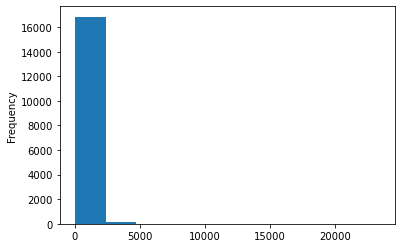

In [201]:
normal['Length'].plot.h

<AxesSubplot:ylabel='Frequency'>

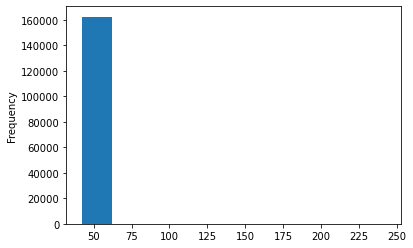

In [205]:
ddos['Length'].plot.hist()

<BarContainer object of 16 artists>

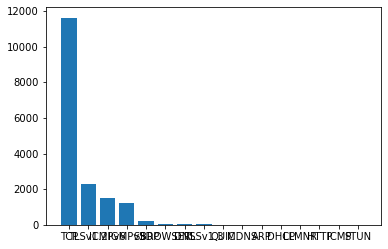

In [206]:
protocol=normal['Protocol'].unique()
numbers=normal['Protocol'].value_counts()
plt.bar(protocol,numbers)

<BarContainer object of 5 artists>

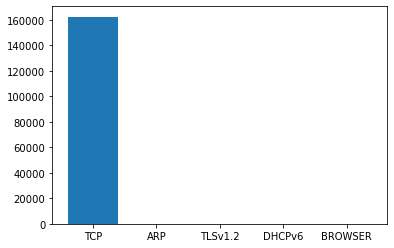

In [208]:
protocol=ddos['Protocol'].unique()
numbers=ddos['Protocol'].value_counts()
plt.bar(protocol,numbers)

<BarContainer object of 92 artists>

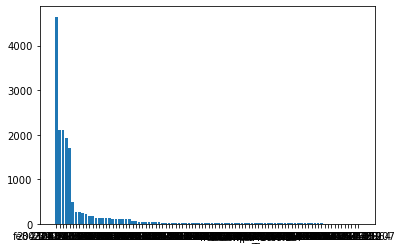

In [209]:
source=normal['Source'].unique()
numbers=normal['Source'].value_counts()
plt.bar(source,numbers)

<BarContainer object of 12 artists>

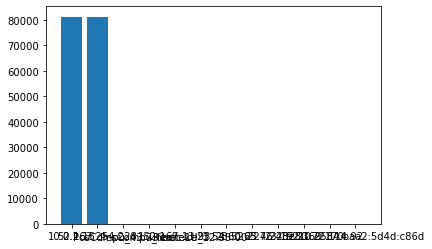

In [210]:
source=ddos['Source'].unique()
numbers=ddos['Source'].value_counts()
plt.bar(source,numbers)

## Merge of the dataset

It will be more convenient to merge the 2 datasets and add a column "Class". 1 will mean DDoS attack while 0 will mean normal traffic.

In [128]:
ddos['Class'] = 1 # We add a column with 1 as constant value
http['Class'] = 0 # We add a column with 0 as constant value

In [129]:
dataset = pd.concat([ddos, http], axis=0).reset_index()
dataset.drop('index', 1, inplace=True)

In [130]:
dataset

,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,1,0.000000,10.0.2.15,52.167.254.228,TCP,54,"49197 > 80 [FIN, ACK] Seq=1 Ack=1 Win=62966 ...",1
1,2,0.002624,52.167.254.228,10.0.2.15,TCP,60,80 > 49197 [ACK] Seq=1 Ack=2 Win=32767 Len=0,1
2,3,0.204789,52.167.254.228,10.0.2.15,TCP,60,"80 > 49197 [FIN, ACK] Seq=1 Ack=2 Win=32767 ...",1
3,4,0.204888,10.0.2.15,52.167.254.228,TCP,54,49197 > 80 [ACK] Seq=2 Ack=2 Win=62966 Len=0,1
4,5,22.343940,PcsCompu_43:73:bc,Broadcast,ARP,60,Who has 10.0.2.1? Tell 10.0.2.5,1
...,...,...,...,...,...,...,...,...
186820,24320,860.774820,10.42.0.2,10.42.0.1,TCP,74,"80 > 53654 [SYN, ACK] Seq=0 Ack=1 Win=28960 ...",0
186821,24321,860.775115,10.42.0.1,10.42.0.2,TCP,66,53654 > 80 [ACK] Seq=1 Ack=1 Win=64256 Len=0...,0
186822,24322,860.775241,10.42.0.1,10.42.0.2,HTTP,256,GET / HTTP/1.1,0
186823,24323,860.775314,10.42.0.2,10.42.0.1,TCP,66,80 > 53654 [ACK] Seq=1 Ack=191 Win=30080 Len...,0


## Analysis of all the columns

### No.

This column is only used to know the order of the packets in Wireshark. We can extract this order from the Time column. Thus, it is not really useful to keep this column.

In [131]:
dataset.drop('No.', 1, inplace=True) # Removing column number

### Time

As explained above, this column can be used to order the data. Furthermore, as we are dealing with DDoS attacks, it can be really useful. Indeed, this kind of attack is meant to completely overwhelm a machine. Thus, having a lot of packets arriving in a small timeframe can be a good indicator. We will keep this column. No specific processing is required on this column at this time, it is clean data.

In [132]:
dataset["Time"]

0           0.000000
1           0.002624
2           0.204789
3           0.204888
4          22.343940
             ...    
186820    860.774820
186821    860.775115
186822    860.775241
186823    860.775314
186824    860.776418
Name: Time, Length: 186825, dtype: float64

In [187]:
normal['Time'].describe()

count    17021.000000
mean       148.223554
std         60.272782
min          0.000000
25%         99.395330
50%        156.314093
75%        197.146622
max        269.385185
Name: Time, dtype: float64

In [189]:
ddos['Time'].describe()

count    162501.000000
mean         89.267633
std          37.480834
min           0.000000
25%          57.863098
50%          88.701548
75%         121.951318
max         155.209325
Name: Time, dtype: float64

### Source

This column allows to know the sender of a request. In the context of a DDoS, many requests will be sent from the same IP address at a short interval of time. That is why it is interesting to keep this column.

In [133]:
dataset["Source"]

0                 10.0.2.15
1            52.167.254.228
2            52.167.254.228
3                 10.0.2.15
4         PcsCompu_43:73:bc
                ...        
186820            10.42.0.2
186821            10.42.0.1
186822            10.42.0.1
186823            10.42.0.2
186824            10.42.0.2
Name: Source, Length: 186825, dtype: object

In [190]:
normal['Source'].value_counts()

10.0.2.15            4647
23.40.112.59         2100
23.33.27.66          2097
131.253.33.200       1935
23.72.210.108        1693
                     ... 
23.65.201.141           2
23.72.17.56             2
PcsCompu_fe:ec:1e       1
PcsCompu_30:7f:54       1
10.0.2.3                1
Name: Source, Length: 92, dtype: int64

### Destination

Idem as Source

In [134]:
dataset["Destination"]

0         52.167.254.228
1              10.0.2.15
2              10.0.2.15
3         52.167.254.228
4              Broadcast
               ...      
186820         10.42.0.1
186821         10.42.0.2
186822         10.42.0.2
186823         10.42.0.1
186824         10.42.0.1
Name: Destination, Length: 186825, dtype: object

In [191]:
normal['Destination'].value_counts()

10.0.2.15            12352
23.40.112.59           568
131.253.33.200         523
23.72.210.108          312
23.33.27.66            241
                     ...  
23.52.242.155            2
23.72.17.56              2
10.0.2.3                 1
PcsCompu_fe:ec:1e        1
Broadcast                1
Name: Destination, Length: 100, dtype: int64

In [192]:
ddos['Destination'].value_counts()

10.0.2.15            81242
152.167.13.93        81223
23.192.169.170           6
ff02::1:2                6
RealtekU_12:35:00        4
PcsCompu_fe:ec:1e        4
23.54.60.65              4
52.167.254.228           2
Broadcast                2
23.52.227.248            2
23.46.252.10             2
23.72.114.92             2
PcsCompu_43:73:bc        1
10.0.2.255               1
Name: Destination, dtype: int64

### Protocol

The protocol used is quite indicative of the traffic that takes place on a machine. Indeed, we notice for example that TCP tends to be the most used protocol for DDoS attacks. Nevertheless, this is a very clean dataset and in reality there will be noise coming from the internet or from other machines communicating with the machine to be analyzed.

We will keep this column.

In [135]:
dataset["Protocol"]

0          TCP
1          TCP
2          TCP
3          TCP
4          ARP
          ... 
186820     TCP
186821     TCP
186822    HTTP
186823     TCP
186824     TCP
Name: Protocol, Length: 186825, dtype: object

In [193]:
normal['Protocol'].value_counts()

TCP        11630
TLSv1.2     2274
TLSv1.3     1516
QUIC        1247
DNS          220
HTTP          50
SSDP          20
MDNS          18
STUN          14
ICMPv6         9
IGMPv3         9
LLMNR          4
BROWSER        3
ICMP           3
ARP            2
DHCP           2
Name: Protocol, dtype: int64

In [194]:
ddos['Protocol'].value_counts()

TCP        162482
ARP            11
DHCPv6          6
TLSv1.2         1
BROWSER         1
Name: Protocol, dtype: int64

### Length

In [195]:
dataset['Length'].describe()

count    186825.000000
mean        208.109257
std        1050.053021
min          42.000000
25%          54.000000
50%          60.000000
75%          60.000000
max       11239.000000
Name: Length, dtype: float64

### Info

This column contains a variety of things. We could tokenize its content but for the moment we will try to do without this column. If our model is not performing well, we will add it if necessary. 

We will not use this column for the moment.

In [136]:
dataset["Info"]

0         49197  >  80 [FIN, ACK] Seq=1 Ack=1 Win=62966 ...
1            80  >  49197 [ACK] Seq=1 Ack=2 Win=32767 Len=0
2         80  >  49197 [FIN, ACK] Seq=1 Ack=2 Win=32767 ...
3            49197  >  80 [ACK] Seq=2 Ack=2 Win=62966 Len=0
4                           Who has 10.0.2.1? Tell 10.0.2.5
                                ...                        
186820    80  >  53654 [SYN, ACK] Seq=0 Ack=1 Win=28960 ...
186821    53654  >  80 [ACK] Seq=1 Ack=1 Win=64256 Len=0...
186822                                      GET / HTTP/1.1 
186823    80  >  53654 [ACK] Seq=1 Ack=191 Win=30080 Len...
186824    80  >  53654 [ACK] Seq=1 Ack=191 Win=30080 Len...
Name: Info, Length: 186825, dtype: object

In [137]:
dataset.drop('Info', 1, inplace=True) # Removing column info

### Final columns

In the end, we obtain a structure of 5 features. We will now try to build a first model.

In [138]:
dataset

,Time,Source,Destination,Protocol,Length,Class
0,0.000000,10.0.2.15,52.167.254.228,TCP,54,1
1,0.002624,52.167.254.228,10.0.2.15,TCP,60,1
2,0.204789,52.167.254.228,10.0.2.15,TCP,60,1
3,0.204888,10.0.2.15,52.167.254.228,TCP,54,1
4,22.343940,PcsCompu_43:73:bc,Broadcast,ARP,60,1
...,...,...,...,...,...,...
186820,860.774820,10.42.0.2,10.42.0.1,TCP,74,0
186821,860.775115,10.42.0.1,10.42.0.2,TCP,66,0
186822,860.775241,10.42.0.1,10.42.0.2,HTTP,256,0
186823,860.775314,10.42.0.2,10.42.0.1,TCP,66,0


## One-hot Encoding

As the data is kind of raw for some columns (such as string columns), we need to convert it to a format easily readable by our model. To do such a thing, we will use one-hot encoding. One-hot encoding consists in converting categorical data into one-hot k bits arrays (with k the number of columns).

In [139]:
print("Example : \n\n")

data = pd.DataFrame(["cat", "dog", "cat", "cat", "horse"])

print(data)
print("\nwill be encoded as :")


one_hot = pd.get_dummies(data)

print()
print(np.array(one_hot))

Example : 


       0
0    cat
1    dog
2    cat
3    cat
4  horse

will be encoded as :

[[1 0 0]
 [0 1 0]
 [1 0 0]
 [1 0 0]
 [0 0 1]]


### The conversion function

Let's create a function to do this one-hot quickly.

In [140]:
def mapping(data):
    data = pd.Series(data)
    
    categories = data.unique()
    
    dict_cat = {}
    
    for i in range(len(categories)):
        dict_cat[categories[i]] = i
    return dict_cat

In [141]:
def one_hot_encode(data, dict_cat):
    data = pd.Series(data)
    
    one_hot = []
    for el in data:
        one_hot.append(dict_cat[el])
    
    return to_categorical(one_hot, num_classes=len(dict_cat.keys()))

In [142]:
data1 = ["cat", "dog", "dog"]

dict1 = mapping(data1)

one_hot1 = one_hot_encode(data1, dict1)

print("The one-hot encoding of", data1, "is :\n")

print(one_hot1)

print("\nwith the following mapping", dict1)

The one-hot encoding of ['cat', 'dog', 'dog'] is :

[[1. 0.]
 [0. 1.]
 [0. 1.]]

with the following mapping {'cat': 0, 'dog': 1}


### Processing of the protocol feature

For the moment, the column "Protocol" is composed of strings. 

In [143]:
dataset['Protocol'].unique()

array(['TCP', 'ARP', 'TLSv1.2', 'DHCPv6', 'BROWSER', 'SSH', 'SSDP',
       'MDNS', 'HTTP', 'ICMP', 'NTP', 'DNS', 'SSHv2'], dtype=object)

As we can see above, it is categorical data with 9 categories. We can thus use one-hot encoding to serialize the values.

In [144]:
dict_protocol = mapping(dataset['Protocol'])

one_hot_protocol = one_hot_encode(dataset['Protocol'], dict_protocol)

The mapping is the following :

In [145]:
print(dict_protocol)

{'TCP': 0, 'ARP': 1, 'TLSv1.2': 2, 'DHCPv6': 3, 'BROWSER': 4, 'SSH': 5, 'SSDP': 6, 'MDNS': 7, 'HTTP': 8, 'ICMP': 9, 'NTP': 10, 'DNS': 11, 'SSHv2': 12}


We join the one-hot encoded array of the protocol column. We can then delete the former Protocol column.

In [146]:
dataset = dataset.join(pd.DataFrame(one_hot_protocol, columns=dict_protocol.keys()))

In [147]:
dataset.drop("Protocol", 1, inplace=True)

We obtain the following DataFrame :

In [148]:
dataset

,Time,Source,Destination,Length,Class,TCP,ARP,TLSv1.2,DHCPv6,BROWSER,SSH,SSDP,MDNS,HTTP,ICMP,NTP,DNS,SSHv2
0,0.000000,10.0.2.15,52.167.254.228,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002624,52.167.254.228,10.0.2.15,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.204789,52.167.254.228,10.0.2.15,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.204888,10.0.2.15,52.167.254.228,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.343940,PcsCompu_43:73:bc,Broadcast,60,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186820,860.774820,10.42.0.2,10.42.0.1,74,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186821,860.775115,10.42.0.1,10.42.0.2,66,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186822,860.775241,10.42.0.1,10.42.0.2,256,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
186823,860.775314,10.42.0.2,10.42.0.1,66,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Validation set

To check any overfitting pattern in our models, we need to import our own sets. Doing this, we will validate our models on brand new data. However, we need to apply the same processing as above to this dataset.

In [149]:
att = pd.read_csv('mysecondattack.csv')
normal = pd.read_csv('normal.csv')
att['Class'] = 1
normal["Class"] = 0

In [150]:
val_dataset = pd.concat([att, normal], axis=0).reset_index()
val_dataset.drop('index', 1, inplace=True)

In [151]:
val_dataset

,No.,Time,Source,Destination,Protocol,Length,Info,Class
0,1,0.000000,fe80::2584:baa2:5d4d:c86d,ff02::1:2,DHCPv6,152,Solicit XID: 0xd0f8ae CID: 0001000121e8031c080...,1
1,2,32.019548,fe80::2584:baa2:5d4d:c86d,ff02::1:2,DHCPv6,152,Solicit XID: 0xd0f8ae CID: 0001000121e8031c080...,1
2,3,227.921904,PcsCompu_43:73:bc,Broadcast,ARP,60,Who has 10.0.2.15? Tell 10.0.2.5,1
3,4,227.922218,PcsCompu_fe:ec:1e,PcsCompu_43:73:bc,ARP,42,10.0.2.15 is at 08:00:27:fe:ec:1e,1
4,5,227.998806,142.7.230.241,10.0.2.15,TCP,60,27573 > 80 [SYN] Seq=0 Win=2493 Len=0,1
...,...,...,...,...,...,...,...,...
66717,17017,266.981299,20.42.65.85,10.0.2.15,TCP,60,[TCP Keep-Alive ACK] 443 > 49315 [ACK] Seq=6...,0
66718,17018,268.253266,54.92.160.104,10.0.2.15,TCP,60,"11103 > 49298 [FIN, ACK] Seq=6518 Ack=2853 W...",0
66719,17019,268.253370,10.0.2.15,54.92.160.104,TCP,54,49298 > 11103 [ACK] Seq=2853 Ack=6519 Win=63...,0
66720,17020,269.384607,10.0.2.15,18.195.152.201,TCP,55,[TCP Keep-Alive] 49288 > 443 [ACK] Seq=2064 ...,0


In [152]:
val_dataset.drop('No.', 1, inplace=True) # Removing column number
val_dataset.drop('Info', 1, inplace=True) # Removing column info

In [153]:
val_dataset = val_dataset[val_dataset.Protocol.isin(dict_protocol.keys())] # Removal of outliers 

one_hot_protocol = one_hot_encode(val_dataset['Protocol'], dict_protocol)

In [154]:
val_dataset

,Time,Source,Destination,Protocol,Length,Class
0,0.000000,fe80::2584:baa2:5d4d:c86d,ff02::1:2,DHCPv6,152,1
1,32.019548,fe80::2584:baa2:5d4d:c86d,ff02::1:2,DHCPv6,152,1
2,227.921904,PcsCompu_43:73:bc,Broadcast,ARP,60,1
3,227.922218,PcsCompu_fe:ec:1e,PcsCompu_43:73:bc,ARP,42,1
4,227.998806,142.7.230.241,10.0.2.15,TCP,60,1
...,...,...,...,...,...,...
66717,266.981299,20.42.65.85,10.0.2.15,TCP,60,0
66718,268.253266,54.92.160.104,10.0.2.15,TCP,60,0
66719,268.253370,10.0.2.15,54.92.160.104,TCP,54,0
66720,269.384607,10.0.2.15,18.195.152.201,TCP,55,0


In [155]:
val_dataset = val_dataset.join(pd.DataFrame(one_hot_protocol, columns=dict_protocol.keys()))

In [156]:
val_dataset.dropna(inplace=True)
val_dataset = val_dataset.drop("Protocol", 1)

In [157]:
val_dataset

,Time,Source,Destination,Length,Class,TCP,ARP,TLSv1.2,DHCPv6,BROWSER,SSH,SSDP,MDNS,HTTP,ICMP,NTP,DNS,SSHv2
0,0.000000,fe80::2584:baa2:5d4d:c86d,ff02::1:2,152,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.019548,fe80::2584:baa2:5d4d:c86d,ff02::1:2,152,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,227.921904,PcsCompu_43:73:bc,Broadcast,60,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,227.922218,PcsCompu_fe:ec:1e,PcsCompu_43:73:bc,42,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,227.998806,142.7.230.241,10.0.2.15,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,210.223758,10.0.2.15,23.33.27.66,54,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63883,210.229013,10.0.2.15,23.33.27.66,54,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63884,210.239689,23.33.27.66,10.0.2.15,1514,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63885,210.239689,23.33.27.66,10.0.2.15,1514,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 1 - First Models

The columns Source and Destination are for the moment hard to use. Indeed, if we just one-hot encode them, there will be a huge overfitting as the DDoS dataset has an unique source IP and same for destination IP.

In [34]:
final = dataset.drop(['Source', 'Destination'], 1).copy()

In [35]:
col_order = list(final.columns.values)

In [36]:
final = final[col_order]

In [37]:
val_final = val_dataset.drop(['Source', 'Destination'], 1).copy()

In [38]:
val_final = val_final[col_order]

For this first model, we will not use the IP. We will introduce them when we will use a sliding-window based model.

In [39]:
final

,Time,Length,Class,TCP,ARP,TLSv1.2,DHCPv6,BROWSER,HTTP,DNS,SSH,SSDP,MDNS,ICMP,NTP,SSHv2
0,0.000000,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002624,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.204789,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.204888,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.343940,60,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343532,860.774820,74,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343533,860.775115,66,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343534,860.775241,256,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
343535,860.775314,66,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
val_final

,Time,Length,Class,TCP,ARP,TLSv1.2,DHCPv6,BROWSER,HTTP,DNS,SSH,SSDP,MDNS,ICMP,NTP,SSHv2
0,0.000000,152,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,32.019548,152,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,227.921904,60,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,227.922218,42,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,227.998806,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,210.223758,54,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63883,210.229013,54,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63884,210.239689,1514,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
63885,210.239689,1514,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
X_train = final.drop('Class', 1).to_numpy()

dict_y = mapping(final['Class'])

y_train = one_hot_encode(final['Class'], dict_y)

In [87]:
X_test = val_final.drop('Class', 1).to_numpy()

y_test = one_hot_encode(val_final['Class'], dict_y)

In [88]:
import matplotlib.pyplot as plt
def show_acc(history, val = False):
    acc = history.history['acc']
   
    loss = history.history['loss']
    print("Train accuracy :", history.history['acc'][-1])
   
    if val:
        val_acc = history.history['val_acc']
        val_loss = history.history['val_loss']
        print("Test accuracy  :", history.history['val_acc'][-1])
   
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    if val:
        plt.plot(epochs, val_acc, 'm', label='Testing acc')
        plt.title('Training and testing accuracy')
    else:
        plt.title('Training accuracy')
    
    plt.legend()

    plt.figure()
    
    plt.plot(epochs, loss, 'b', label='Training loss')
    
    if val:
        
        plt.plot(epochs, val_loss, 'm', label='Testing loss')
        plt.title('Training and test loss')
    else:
        plt.title("Training loss")
    plt.legend()

    plt.show()

### Model 1

In [89]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [90]:
model = Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', metrics=['acc'], loss='binary_crossentropy')

In [91]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=200, epochs= 50, verbose=0)

Train accuracy : 0.9994090795516968
Test accuracy  : 0.025626830756664276


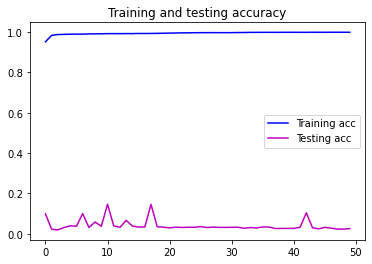

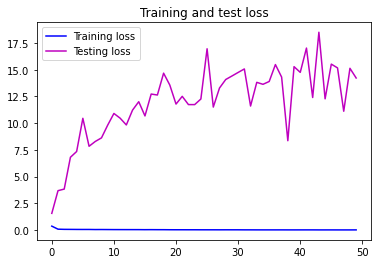

In [92]:
show_acc(history, val=True)

In [93]:
model.evaluate(X_test, y_test, batch_size=200)  

308/308 [==============================] - 0s 1ms/step - loss: 14.2223 - acc: 0.0256


[14.222283363342285, 0.025626830756664276]

In [94]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [95]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

100 * confusion_matrix(y_true, y_pred) / len(y_pred)

array([[4.88440247e-03, 8.08596548e+01],
       [1.65776620e+01, 2.55779876e+00]])

In [96]:
balanced_accuracy_score(y_true, y_pred)

0.06686420096942035

### Model 2

In [97]:
model = Sequential()

model.add(layers.Flatten())
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='sigmoid'))

model.compile(optimizer='adam', metrics=['acc'], loss='binary_crossentropy')

In [98]:
history = model.fit(X_train, y_train,  validation_data=(X_test, y_test), batch_size=200, epochs= 20, verbose=0)

Train accuracy : 0.9854833483695984
Test accuracy  : 0.03309996798634529


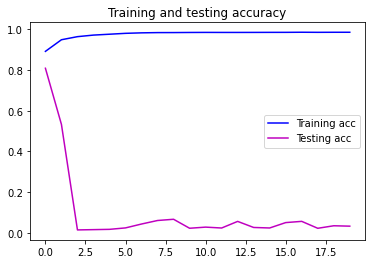

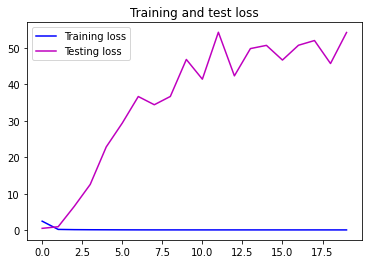

In [100]:
show_acc(history, val=True)

In [101]:
model.evaluate(X_test, y_test, batch_size=200)  

308/308 [==============================] - 1s 2ms/step - loss: 54.2673 - acc: 0.0331


[54.26731872558594, 0.03309996798634529]

In [102]:
y_pred = model.predict(X_test)
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [103]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

100 * confusion_matrix(y_true, y_pred) / len(y_pred)

array([[3.25626832e-03, 8.08612830e+01],
       [1.58287203e+01, 3.30674048e+00]])

In [104]:
balanced_accuracy_score(y_true, y_pred)

0.0864236055471566

## Conclusion

As we can see, we have a clear overfitting, no matter which model we use. We need to modify our dataset to make it less "overfittable".

## 2 - Models using a Sliding Window

As we have seen before, predicting line by line is almost impossible. We have to use the notion of time implied by the column "Time". For this, we will use what is called Sliding Windows. It consists in grouping the rows of our dataset in groups of length k. We will also deal with IPs in this section.

In [158]:
dataset

,Time,Source,Destination,Length,Class,TCP,ARP,TLSv1.2,DHCPv6,BROWSER,SSH,SSDP,MDNS,HTTP,ICMP,NTP,DNS,SSHv2
0,0.000000,10.0.2.15,52.167.254.228,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.002624,52.167.254.228,10.0.2.15,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.204789,52.167.254.228,10.0.2.15,60,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.204888,10.0.2.15,52.167.254.228,54,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,22.343940,PcsCompu_43:73:bc,Broadcast,60,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186820,860.774820,10.42.0.2,10.42.0.1,74,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186821,860.775115,10.42.0.1,10.42.0.2,66,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186822,860.775241,10.42.0.1,10.42.0.2,256,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
186823,860.775314,10.42.0.2,10.42.0.1,66,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Sliding window function

We will use a window length of 5. Here is a basic function to create sliding windows from our data.

In [159]:
def windows_process(data, window_len = 5):
    
    data = np.array(data)
    windows = []
    classes = []
    for i in range(len(data) - window_len):
        window = []
        for j in range(window_len):
            window.append(data[i+j])
        class_name = window[0][4]
        classes.append(class_name)
        windows.append(window)
    windows = np.array(windows)
    classes = np.array(classes)
    return windows, classes

In [160]:
test = dataset[:30]
print("From a shape of", test.to_numpy().shape)
print("To a shape of", windows_process(test)[0].shape)

From a shape of (30, 18)
To a shape of (25, 5, 18)


This function is working but we need more in our case.

### Time normalization

In our case, we need to normalize a lot of things. First of all, we need to normalize time values. To do such a thing, we will make sure that every window start at 0.

In [161]:
def normalize_time(window):
    start_time = window[0][0]
    for i in range(len(window)):
        window[i][0] = window[i][0] - start_time

    return window

### Introducing IPs

We have to use IPs in a special way. Indeed, if we do a simple one hot encoding on the whole dataset, there will be overfitting as a DDoS comes from a certain IP. What we are going to do is to do a one hot encoding of the IPs inside the windows to detect IP repetitions.

In [162]:
def IP_process(window):
    dict_ip = mapping(window[:,1:3].flatten())
    
    for i in range(len(window)):
        window[i][1] = dict_ip[ window[i][1]]
        window[i][2] = dict_ip[ window[i][2]]
        
    return window

### Processing our dataset

In [163]:
time_dataset, classes = windows_process(dataset)

In [164]:
time_dataset_test, classes_test = windows_process(val_dataset)

In [165]:
for i in range(len(time_dataset)):
    time_dataset[i] = normalize_time(time_dataset[i])
    time_dataset[i] = IP_process(time_dataset[i])

In [166]:
for i in range(len(time_dataset_test)):
    time_dataset_test[i] = normalize_time(time_dataset_test[i])
    time_dataset_test[i] = IP_process(time_dataset_test[i])

### Model

In [167]:
time_dataset =  np.asarray(time_dataset).astype('float32')

dict_y = mapping(classes)

y_train = one_hot_encode(classes, dict_y)

In [168]:
time_dataset_test =  np.asarray(time_dataset_test).astype('float32')

y_test = one_hot_encode(classes_test, dict_y)

In [170]:
from tensorflow.keras import regularizers
model = Sequential()

model.add(layers.Normalization())

model.add(layers.LSTM(2, return_sequences=True))
model.add(layers.Flatten())

model.add(layers.Dense(4,activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))

model.add(layers.Dropout(.2))
model.add(layers.Dense(8,activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), bias_regularizer=regularizers.L2(1e-4),activity_regularizer=regularizers.L2(1e-5)))


model.add(layers.Dropout(.2))
model.add(layers.Dense(2,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 


history = model.fit(time_dataset, y_train, validation_data=(time_dataset_test, y_test), epochs = 20, batch_size=500, verbose=1)

Epoch 1/20
374/374 [==============================] - 5s 7ms/step - loss: 0.5757 - acc: 0.7830 - val_loss: 0.4783 - val_acc: 0.8087
Epoch 2/20
374/374 [==============================] - 2s 5ms/step - loss: 0.2331 - acc: 0.9310 - val_loss: 0.0338 - val_acc: 0.9995
Epoch 3/20
374/374 [==============================] - 2s 5ms/step - loss: 0.0568 - acc: 0.9920 - val_loss: 0.0096 - val_acc: 0.9992
Epoch 4/20
374/374 [==============================] - 2s 4ms/step - loss: 0.0350 - acc: 0.9940 - val_loss: 0.0083 - val_acc: 0.9994
Epoch 5/20
374/374 [==============================] - 2s 5ms/step - loss: 0.0269 - acc: 0.9971 - val_loss: 0.0089 - val_acc: 0.9994
Epoch 6/20
374/374 [==============================] - 2s 6ms/step - loss: 0.0214 - acc: 0.9977 - val_loss: 0.0096 - val_acc: 0.9994
Epoch 7/20
374/374 [==============================] - 2s 6ms/step - loss: 0.0185 - acc: 0.9980 - val_loss: 0.0097 - val_acc: 0.9996
Epoch 8/20
374/374 [==============================] - 2s 6ms/step - loss: 0.

Train accuracy : 0.998715341091156
Test accuracy  : 0.9995929598808289


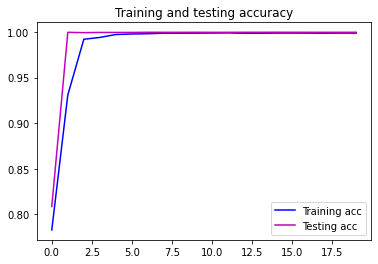

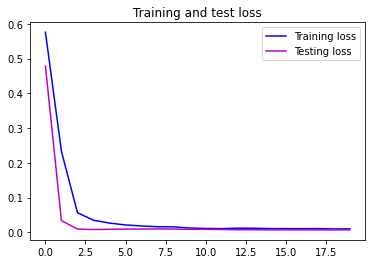

In [171]:
show_acc(history, val=True)

In [176]:
y_pred = model.predict(time_dataset_test)
y_pred=np.argmax(y_pred, axis=1)
y_true=np.argmax(y_test, axis=1)

In [177]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix

100 * confusion_matrix(y_true, y_pred) / len(y_pred)

array([[8.08304160e+01, 4.07066678e-02],
       [0.00000000e+00, 1.91288773e+01]])

In [178]:
balanced_accuracy_score(y_true, y_pred)

0.9997483238367528

In [179]:
model.save("model.h5")